# Assignment 2: Part 1

### Task 1: (15 points)
Implement *DropOut* from scratch using PyTorch. Note that you are not allowed to use torch.nn.Dropout. This task is similar to the previous assignment, but you should use the tensor functionality of PyTorch instead of numpy arrays.
*DropOut* takes only one argument, which is the probability that it will be applied to each element of an input tensor.

Note that *DropOut* should show different behaviour in `train` and `eval` modes.

In [ ]:
#TODO: Implement DropOut class here
import torch

class DropOut:
  def __init__(self, probability = 0.5):
    # probability = 0.5 is the default value according to the Pytorch's Dropout documentation, it could be changed later
    self.probability = probability
    self.train_mode = None

  def train(self):
    self.train_mode = True

  def eval(self):
    self.train_mode = False

  def forward(self, input):
    if (self.train_mode == True):
      input = input * (1/(1-self.probability))
      # Create a tensor of the size of the input (with value between 0 and 1) and if the value > probability, set it to 1, else 0
      dropout_layer = (torch.rand(size=input.size()) > self.probability).float()
      result = input * dropout_layer
      return result
    else:
      result = input
      return result

In [ ]:
# Test code for DropOut
myDropOut = DropOut(probability=0.2)
myDropOut.train()
torch.manual_seed(42) # Make the random testTensor1 always give the same value
testTensor1 = torch.rand(5, 4)
result = myDropOut.forward(input=testTensor1)
print(f"Input value is: {testTensor1}\n")
print(f"Result is: {result}")

Input value is: tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274]])

Result is: tensor([[1.1028, 1.1438, 0.4786, 1.1991],
        [0.0000, 0.7511, 0.3207, 0.0000],
        [1.1760, 0.0000, 1.1682, 0.0000],
        [1.0868, 0.7096, 0.9264, 0.5368],
        [1.1068, 0.7174, 0.3332, 0.7843]])


In [ ]:
# Test code to find the real value of Dropout
test_Dropout = torch.nn.Dropout(0.2)
torch.manual_seed(42)
input = torch.rand(5, 4)
ans = test_Dropout(input)
print(f"Input value is: {input}\n")
print(f"Result is: {ans}")

Input value is: tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936],
        [0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274]])

Result is: tensor([[1.1028, 1.1438, 0.4786, 1.1991],
        [0.4881, 0.7511, 0.3207, 0.9921],
        [0.0000, 0.0000, 0.0000, 0.7420],
        [1.0868, 0.7096, 0.9264, 0.5368],
        [1.1068, 0.7174, 0.3332, 0.0000]])


### Task 2: (15 points)

Research Covariate shift and batch normalization, and implement `BatchNorm1d`, the batch normalization, **from scratch**.
You can initialize $\gamma$ (scale) as a tensor of ones and $\beta$ (shift) as a tensor of zeros.
Note that *BatchNorm1d* should show different behaviour in `train` and `eval` modes.


In [ ]:
#TODO: Implement BatchNorm1d here
import torch

class BatchNorm1d:
  def __init__(self, number_of_features, epsilon = 1e-5, momentum=0.1): # Initial values are from Torch documentation for BatchNorm1D
    self.number_of_features = number_of_features
    self.epsilon = epsilon
    self.momentum = momentum
    self.scale = torch.ones(number_of_features)
    self.shift = torch.zeros(number_of_features)
    self.running_est_mean = torch.zeros(number_of_features)
    self.running_est_variance = torch.ones(number_of_features)

  def train(self):
    self.train_mode = True

  def eval(self):
    self.train_mode = False

  def forward(self, input):
    if (self.train_mode):
      expected_value = input.mean(dim=0) # Calculate expected value
      variance = input.var(dim=0, unbiased=False) # Calculate variance (I need to set unbiased to False so the test value match)

      # Calculate to keep track of running estimate of mean and variance
      self.running_est_mean = (1-self.momentum) * self.running_est_mean + self.momentum * expected_value
      self.running_est_variance = (1-self.momentum) * self.running_est_variance + self.momentum * variance

      # Calculate return value
      nominator = input - expected_value
      denominator = torch.sqrt(variance + self.epsilon)
      result = nominator/denominator
      result = result * self.scale + self.shift

    else:
      # Use the running estimate of mean and variance to normalize data
      nominator = input - self.running_est_mean
      denominator = torch.sqrt(self.running_est_variance + self.epsilon)
      result = nominator/denominator
      result = result * self.scale + self.shift

    return result

In [ ]:
batchNorm1d = BatchNorm1d(number_of_features=100)
batchNorm1d.train()
torch.manual_seed(42)
input = torch.randn(20, 100)
print(batchNorm1d.forward(input))

tensor([[ 1.9804,  0.9999,  0.3488,  ...,  0.4652,  0.6788,  0.0317],
        [ 0.6687,  0.1961,  0.5063,  ...,  0.3198,  0.2854,  1.4609],
        [ 0.5518,  1.5553, -0.9982,  ...,  0.2033,  0.8741,  0.7690],
        ...,
        [-0.6074,  0.6226,  0.6534,  ..., -0.4492, -0.4772, -0.9109],
        [ 0.3217,  1.1352, -1.5229,  ...,  0.2600, -1.2312,  1.9219],
        [-0.2842,  0.1436,  0.4605,  ..., -1.4383,  0.9230,  0.4896]])


In [ ]:
# Test code to find the real value of BatchNorm1d
test_func = torch.nn.BatchNorm1d(num_features=100)
torch.manual_seed(42)
input = torch.randn(20, 100)
ans = test_func(input)
print(ans)

tensor([[ 1.9804,  0.9999,  0.3488,  ...,  0.4652,  0.6788,  0.0317],
        [ 0.6687,  0.1961,  0.5063,  ...,  0.3198,  0.2854,  1.4609],
        [ 0.5518,  1.5553, -0.9982,  ...,  0.2033,  0.8741,  0.7690],
        ...,
        [-0.6074,  0.6226,  0.6534,  ..., -0.4492, -0.4772, -0.9109],
        [ 0.3217,  1.1352, -1.5229,  ...,  0.2600, -1.2312,  1.9219],
        [-0.2842,  0.1436,  0.4605,  ..., -1.4383,  0.9230,  0.4896]],
       grad_fn=<NativeBatchNormBackward0>)


# Assignment 2: Part 2
In this assignment, we will use a multi-layer perceptron network to build an image classifier for single digits.
Download and extract the MNISTDigit.zip file from D2L. This contains images for the digit classification task. The dataset contains 10 classes, where class `i` contains images of digit `i`.

### Task 3: (5 points)
Explore the dataset by visualizing a few examples of each class and finding and showing the number of samples in each class of the train folder. Do you observe any data imbalance in this dataset?

In [ ]:
from pathlib import Path
import os
!pip install gdown

# data_path = Path("/content") # This one is hard coded
data_path = Path(os.getcwd()) # This one will return your current path, so it will works better
image_path = data_path / "MNISTDigit"
zip_path = data_path / "MNISTDigit.zip"

if zip_path.exists():
  print("The zip file MNISTDigit existed")
else:
  !gdown --id 13ZdAm179cYrP7ZhcYU5ZvYo1Ozp4wvWC -O MNISTDigit.zip
  # I download the zip file from D2L and put in my Google Drive
  # The link is https://drive.google.com/file/d/13ZdAm179cYrP7ZhcYU5ZvYo1Ozp4wvWC/view?usp=sharing

if image_path.is_dir():
  print("The unzipped folder MNISTDigit existed")
else:
  !unzip -o MNISTDigit.zip # The flag "-o" will overwrite if folder existed

The zip file MNISTDigit existed
The unzipped folder MNISTDigit existed


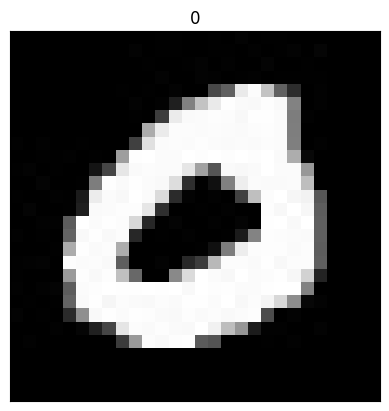

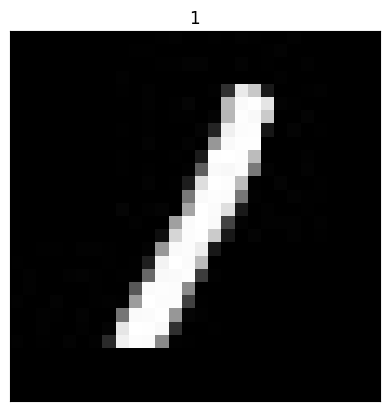

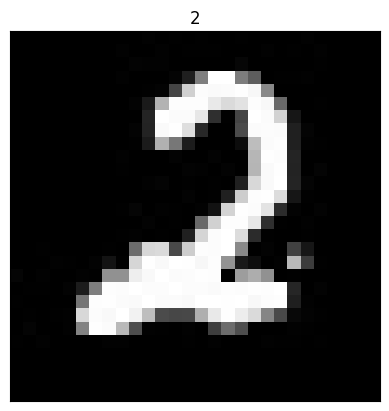

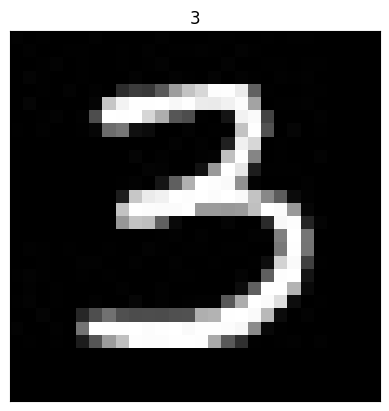

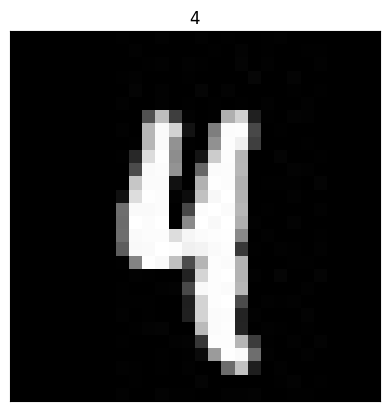

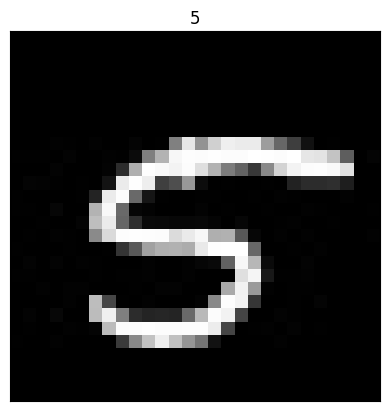

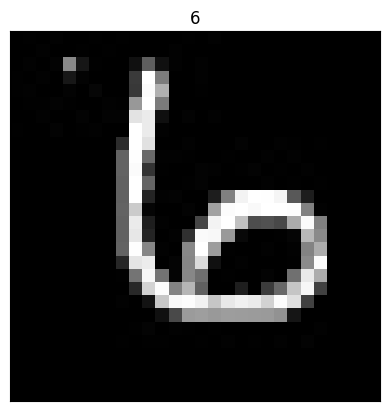

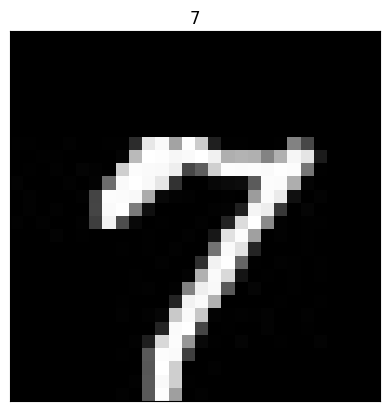

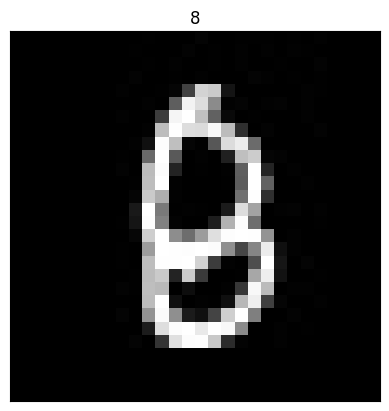

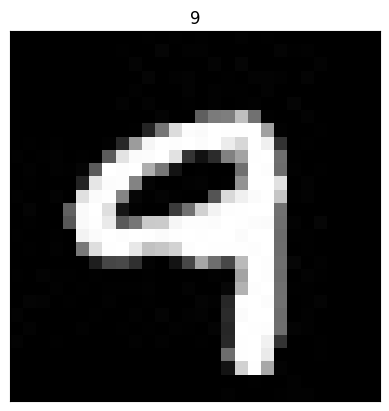

In [ ]:
import random
from PIL import Image
from matplotlib import pyplot as plt

for i in range(10):
  train_dir_i = image_path / f"train/{i}"
  image_path_list = list(train_dir_i.glob("*.jpg"))

  # 2. Pick a random path
  random_image_path = random.choice(image_path_list)

  # 4. Open image
  img = Image.open(random_image_path)

  # 5. Print sample image
  plt.figure()
  plt.imshow(img, cmap='gray')
  plt.title(i)
  plt.xticks([])
  plt.yticks([])

In [ ]:
import os
# This array will store how many images in each class
class_size_array = torch.zeros(10) # There are 10 classes, I implement the DigitDataset below so I can't get no of class here
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    class_name = os.path.basename(dirpath)
    if class_name.isdigit():
      num_pics_per_class = len(filenames)
      class_size_array[int(class_name)] = num_pics_per_class # Here I save how many pics are there per class for WeightedRandomSampler calculation below
      print(f"There are {len(dirnames)} directories and {num_pics_per_class} images in class {class_name}.")

walk_through_dir(image_path / "train")

There are 0 directories and 5842 images in class 4.
There are 0 directories and 4427 images in class 3.
There are 0 directories and 9361 images in class 6.
There are 0 directories and 6742 images in class 1.
There are 0 directories and 2658 images in class 9.
There are 0 directories and 5958 images in class 2.
There are 0 directories and 1845 images in class 0.
There are 0 directories and 11702 images in class 8.
There are 0 directories and 5421 images in class 5.
There are 0 directories and 12530 images in class 7.


In [ ]:
print(class_size_array)

tensor([ 1845.,  6742.,  5958.,  4427.,  5842.,  5421.,  9361., 12530., 11702.,
         2658.])


From exploring the dataset, I found out that the number of each class in the train are not equal.

For instance, class 7 is the class with the most images with 12530 images followed by class 8 with 11702 images. However, there are some classes with not many images like class 0 with only 1845 images or class 9 with 2658 images.



### Task 4: (15 points)

Data has been organized in train and test folders, where samples from each digit are located in a folder with the digit as the folder name.
Implement `DigitDataset` as a Map-style PyTorch dataset (read more about Map-style datasets [here]( https://pytorch.org/docs/stable/data.html#map-style-datasets) )

In [ ]:
#TODO: Implement the DigitDataset class here
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.Grayscale(num_output_channels=1), transforms.ToTensor()])
class DigitDataset:
  def __init__(self, dataset_dir, transform, target_transform=None):
    self.dataset_dir = dataset_dir
    self.transform = transform
    self.target_transform = target_transform
    self.dataset_data = datasets.ImageFolder(root=dataset_dir,
                                  transform=transform,
                                  target_transform=target_transform)

  def __getitem__(self, index):
    image, label = self.dataset_data[index]
    return image, label

  def __len__(self):
    return len(self.dataset_data)

In [ ]:
train_dir = data_path / "MNISTDigit/train"
test_dir = data_path / "MNISTDigit/test"

#### Task 5: (10 points)

Use `DigitDataset` class to create `test_dataset` from samples in the test folder and to create `train_dataset` (80% of samples in train folder) and `valid_dataset` (20% of samples in train folder).

For creating `train_dataset` and `valid_dataset`, you should use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and [`torch.utils.data.Subset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Subset) to split the dataset in a **stratified** manner.

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset
#TODO: Add the mplementation here
train_data = DigitDataset(dataset_dir=train_dir, transform=transform)
train_dataset_indices, valid_dataset_indices = train_test_split(list(range(len(train_data))), test_size=0.2, random_state=42, stratify=train_data.dataset_data.targets)
train_dataset = Subset(dataset=train_data, indices=train_dataset_indices)
valid_dataset = Subset(dataset=train_data, indices=valid_dataset_indices)

test_dataset = DigitDataset(dataset_dir=test_dir, transform=transform)

In [ ]:
len(train_dataset), len(valid_dataset), len(test_dataset)

(53188, 13298, 10000)

### Task 6: (5 points)
Create dataloader objects for `train_dataset`, `validation_dataset`, and `test_dataset`. Fro `train_dataset`, you should use the [`WeightedRandomSampler`](https://pytorch.org/docs/stable/data.html#torch.utils.data.WeightedRandomSampler) all classes are contributing to the model training almost equally, i.e. in each batch, samples from each class have almost the same chance of contibuting to gradient calculation.

In [ ]:
# This is my test code to see what's the previous code print
print(train_dataset[53187][1])
print(len(train_dataset))
print(class_size_array)
print(len(train_data.dataset_data.classes))

7
53188
tensor([ 1845.,  6742.,  5958.,  4427.,  5842.,  5421.,  9361., 12530., 11702.,
         2658.])
10


In [ ]:
from torch.utils.data import WeightedRandomSampler
#TODO: Add the implementation here
train_dataset_length = len(train_dataset)
train_dataset_weights = 1./torch.tensor(train_dataset_length)

# This code will create an array so that the total weight of each class will be 1.0/10 (there are 10 classes)
weight_for_sampler = torch.zeros(len(train_dataset))
how_many_class = len(train_data.dataset_data.classes) # 10 classes
for i in range(len(train_dataset)):
    class_index = train_dataset[i][1]
    weight_for_sampler[i] = 1. / (how_many_class * class_size_array[class_index])

weight_sampler = WeightedRandomSampler(weights=weight_for_sampler, num_samples=train_dataset_length, replacement=True)

from torch.utils.data import DataLoader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size, sampler=weight_sampler)
test_loader = DataLoader(test_dataset, batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size, shuffle=True)

In [ ]:
# Test code
print(weight_for_sampler.shape)
print(weight_for_sampler[53187])

torch.Size([53188])
tensor(7.9808e-06)


### Task 7: (5 points)
Develop an MLP model named `DigitClassification` for classifying digit images. The developed model should have four hidden layers of 256, 128, 64, and 32 neurons. Each hidden layer should be followed with a ReLU unit and a Dropout layer (p=0.2).


In [ ]:
#TODO implement DigitClassification model here
from torch import nn
class DigitClassification(nn.Module):
  def __init__(self):
    super().__init__()

    # Define the layer
    self.layer = nn.Sequential(
      nn.Flatten(),
      nn.Linear(28*28, 256),
      nn.ReLU(),
      nn.Dropout(p=0.2),

      nn.Linear(256, 128),
      nn.ReLU(),
      nn.Dropout(p=0.2),

      nn.Linear(128, 64),
      nn.ReLU(),
      nn.Dropout(p=0.2),

      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Dropout(p=0.2),

      nn.Linear(32, 10)
    )

  def forward(self, input):
    return self.layer(input)

model = DigitClassification()

### Task 8: (10 points)

Implement a function for training and a function for evaluation. Then, train the model. You need to define the necessary components for model training. The evaluation code should calculate model *accuracy*, *sensitivity*, *specificity*, and *precision*. You should implement these metrics from scratch given the predictions and ground truth vectors/lists. For this assignment you should use macro-averaging when implementing  *sensitivity*, *specificity*, and *precision*.

Note: You may adapt code from the class.




In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
# num_class = myDigitDataset.train_data.classes
num_class = train_data.dataset_data.classes
print(num_class)

# class_idx = myDigitDataset.train_data.class_to_idx
class_idx = train_data.dataset_data.class_to_idx
print(class_idx)
print(len(num_class))

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9}
10


In [ ]:
def evaluation(model, criterion, data_loader, device):
  model.eval()
  correct = 0
  total = 0
  sensitivity = 0
  specificity = 0
  precision = 0
  true_positive_list = torch.zeros(len(num_class))
  true_negative_list = torch.zeros(len(num_class))
  false_positive_list = torch.zeros(len(num_class))
  false_negative_list = torch.zeros(len(num_class))
  eval_loss = 0

  for images, labels in data_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    eval_loss += criterion(outputs, labels) * images.size(0)
    _, prediction = torch.max(outputs.data, 1)
    total += images.size(0)
    correct += (prediction == labels).sum().item()

    for i in range(len(num_class)):
        true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0
        true_positive += ((prediction == i) & (labels == i)).sum().item()
        true_negative += ((prediction != i) & (labels != i)).sum().item()
        false_positive += ((prediction == i) & (labels != i)).sum().item()
        false_negative += ((prediction != i) & (labels == i)).sum().item()
        true_positive_list[i] += true_positive
        true_negative_list[i] += true_negative
        false_positive_list[i] += false_positive
        false_negative_list[i] += false_negative

  for i in range(len(num_class)):
    sensitivity_for_class_i = true_positive_list[i] / (true_positive_list[i] + false_negative_list[i])
    specificity_for_class_i = true_negative_list[i] / (true_negative_list[i] + false_positive_list[i])
    precision_for_class_i = true_positive_list[i] / (true_positive_list[i] + false_positive_list[i])
    # Sensitivity for all class
    sensitivity += sensitivity_for_class_i
    specificity += specificity_for_class_i
    precision += precision_for_class_i

  # Macro-average sensitivity
  sensitivity /= len(num_class)
  specificity /= len(num_class)
  precision /= len(num_class)

  accuracy = 100 * correct / total
  eval_loss = eval_loss / total
  print(f'Validation Accuracy: {accuracy:5.2f} | Sensitivity: {sensitivity:5.2f} | Specificity: {specificity:5.2f} | Precision: {precision:5.2f} | Loss: {eval_loss:5.2f}\n')
  return accuracy, sensitivity, specificity, precision, eval_loss

# Initialization to save best model
best_model = model.state_dict()
MODEL_FOLDER_PATH = Path("models")
MODEL_FOLDER_PATH.mkdir(parents=True, exist_ok=True)
MODEL_SAVED_PATH = MODEL_FOLDER_PATH / "DL4Vision_A2.pth"
def train(train_loader, epochs, print_interval=1):
  model.train()

  validation_loss_old = 0
  best_loss = torch.inf
  highest_accuracy = 0

  total = 0
  correct = 0

  for epoch in range(epochs):
    train_loss = 0

    sensitivity, specificity, precision = 0, 0, 0

    true_positive_list = torch.zeros(len(num_class))
    true_negative_list = torch.zeros(len(num_class))
    false_positive_list = torch.zeros(len(num_class))
    false_negative_list = torch.zeros(len(num_class))

    for batch, (image, label) in enumerate(train_loader):
      image = image.to(device)
      label = label.to(device)
      optimizer.zero_grad()
      output = model(image)
      loss = criterion(output, label)
      train_loss += loss.item() * image.size(0)

      loss.backward()
      optimizer.step()

      _, prediction = torch.max(output.data, 1)
      total += image.size(0)
      correct += (prediction == label).sum().item()

      for i in range(len(num_class)):
          true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0
          true_positive += ((prediction == i) & (label == i)).sum().item()
          true_negative += ((prediction != i) & (label != i)).sum().item()
          false_positive += ((prediction == i) & (label != i)).sum().item()
          false_negative += ((prediction != i) & (label == i)).sum().item()
          true_positive_list[i] += true_positive
          true_negative_list[i] += true_negative
          false_positive_list[i] += false_positive
          false_negative_list[i] += false_negative

    for i in range(len(num_class)):
      sensitivity_for_class_i = true_positive_list[i] / (true_positive_list[i] + false_negative_list[i])
      specificity_for_class_i = true_negative_list[i] / (true_negative_list[i] + false_positive_list[i])
      precision_for_class_i = true_positive_list[i] / (true_positive_list[i] + false_positive_list[i])
      # Sensitivity for all class
      sensitivity += sensitivity_for_class_i
      specificity += specificity_for_class_i
      precision += precision_for_class_i

      # Macro-average sensitivity
    sensitivity /= len(num_class)
    specificity /= len(num_class)
    precision /= len(num_class)


    if batch % print_interval == 0:
      accuracy = 100 * correct / total
      loss = train_loss / total
      print(f'Epoch: {epoch+1} | Train Accuracy: {accuracy:5.2f} | Sensitivity: {sensitivity:5.2f} | Specificity: {specificity:5.2f} | Precision: {precision:5.2f} | Loss: {loss:5.2f}')
      with torch.no_grad():
        e_accuracy, e_sensitivity, e_specificity, e_precision, eval_loss = evaluation(model, criterion, test_loader, device)
        if (eval_loss < best_loss):
          highest_accuracy = e_accuracy # I want the highest accuracy to be the accuracy of the epoch with the lowest loss
          best_loss = eval_loss
          best_model = model.state_dict()
          torch.save(obj=best_model, f=MODEL_SAVED_PATH)
        elif (eval_loss == best_loss and e_accuracy > highest_accuracy):
          highest_accuracy = e_accuracy
          best_loss = eval_loss
          best_model = model.state_dict()
          torch.save(obj=best_model, f=MODEL_SAVED_PATH)

### Task 9: (5 points)

Train the model for 100 epochs. Training and validation *accuracy*, *sensitivity*, *specificity*, *precision* and *loss* should be printed for each epoch for both training and validation sets.

In [ ]:
#TODO: runin the training process for 100 epochs
train(train_loader, 100)

Epoch: 1 | Train Accuracy: 69.94 | Sensitivity:  0.70 | Specificity:  0.97 | Precision:  0.72 | Loss:  0.89
Validation Accuracy: 93.23 | Sensitivity:  0.93 | Specificity:  0.99 | Precision:  0.93 | Loss:  0.23

Epoch: 2 | Train Accuracy: 83.01 | Sensitivity:  0.96 | Specificity:  1.00 | Precision:  0.96 | Loss:  0.07
Validation Accuracy: 96.16 | Sensitivity:  0.96 | Specificity:  1.00 | Precision:  0.96 | Loss:  0.13

Epoch: 3 | Train Accuracy: 87.89 | Sensitivity:  0.98 | Specificity:  1.00 | Precision:  0.98 | Loss:  0.03
Validation Accuracy: 96.54 | Sensitivity:  0.97 | Specificity:  1.00 | Precision:  0.97 | Loss:  0.12

Epoch: 4 | Train Accuracy: 90.52 | Sensitivity:  0.98 | Specificity:  1.00 | Precision:  0.98 | Loss:  0.01
Validation Accuracy: 97.07 | Sensitivity:  0.97 | Specificity:  1.00 | Precision:  0.97 | Loss:  0.10

Epoch: 5 | Train Accuracy: 92.16 | Sensitivity:  0.99 | Specificity:  1.00 | Precision:  0.99 | Loss:  0.01
Validation Accuracy: 96.86 | Sensitivity:  0.97 

### Task 10: (5 points)

Test your *best model* using the `test_dataset`, and report *accuracy*, *sensitivity*, *specificity*, and *precision* and *loss*. You can consider the model with the lowest loss value on the validation set as the *best model*.

In [ ]:
#TODO: test your best_model here

# Load the saved model
loaded_model = DigitClassification()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVED_PATH))

evaluation(loaded_model, criterion, test_loader, device)

Validation Accuracy: 97.07 | Sensitivity:  0.97 | Specificity:  1.00 | Precision:  0.97 | Loss:  0.10



(97.07,
 tensor(0.9705),
 tensor(0.9967),
 tensor(0.9707),
 tensor(0.0991, grad_fn=<DivBackward0>))

### Task 11: (10 points)

We would like to see how accurate the trained model is when applied to a set of images of digits with slight differences. The image of a digit in our dataset has a black background (0 value for pixel values). This might be like writing with white chalk on a blackboard. We make slight changes in the test datasets by applying a simple change. We invert the pixel intensity values. The resulting images resemble a digit written with a black marker on a whiteboard. Test the model using the updated test_dataset, and report your observations regarding model performance. How would you change your pipeline if you redo this experiment?

In [93]:
#TODO: Implement coding part of your answer here
# Prepare the updated test_dataset
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Grayscale(num_output_channels=1), transforms.Lambda(lambda x: 1 - x)])
inverted_dataset = DigitDataset(test_dir, transform=transform)
inverted_test_loader = DataLoader(inverted_dataset, batch_size, shuffle=True)

In [94]:
# Function to print out the inverted images
def show_inverted_images(dataset, num_images):
    fig, axes = plt.subplots(1, num_images, figsize=(5, 2))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.squeeze()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# image, label = inverted_dataset[1]
# image = image.squeeze()

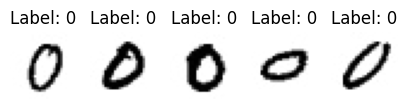

In [95]:
# Print the first 5 images
show_inverted_images(inverted_dataset, 5)

In [96]:
evaluation(loaded_model, criterion, inverted_test_loader, device)

Validation Accuracy:  5.00 | Sensitivity:  0.06 | Specificity:  0.90 | Precision:   nan | Loss:  9.56



(5.0,
 tensor(0.0558),
 tensor(0.8950),
 tensor(nan),
 tensor(9.5624, grad_fn=<DivBackward0>))

**TODO: Write about your observation here**

My observation is that if I inverted the images and then test them with my model. It became so inaccurate. The reason I believe is that my machine learning model is not trained on the inverted color images so that it can't predict well on those images set.

To deal with this issue, my apporach to modify my pipeline is as follow:

At first, I will try to use data argumentation by include inverted color images in my dataset so that my model will be exposed to both types of images in the training process. As a consequence, it will become more accurate when making predictions from the inverted color images.

Secondly, if I have to make prediction based on the inverted color images, I could try to convert its color to the color that I train my model on so my model could be familiar with the images to make better predictions.

Thirdly, I could also try to doing reasearch so that I could make changes to my model's architecture or loss functions so that it'll be less sensitive to changes in color scheme.

In my opinion, I don't have to do all of the changes mentioned above. However, if applying one change is not enough, then I will try to implement all of the modifications mentioned above to bring the best performance to my model.


